In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


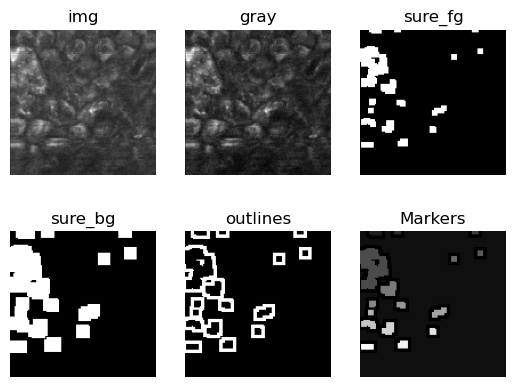

Anzahl an Zellen: 17


True

In [4]:
img = cv2.imread('beispiel.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# threshold to the grayscale image to binarize it and seperate the cells from the background
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#use morphological operations such as erosion and dilation to remove noise and improve cell separation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
#apply distance transformation to detect the cells edges
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.01*dist_transform.max(),255,0)
#use a watershed algorithm to segment the cells
sure_fg = np.uint8(sure_fg)
unknow = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers +1
markers[unknow==255] = 0
#count the numbers of cells detected
cells_count = len(np.unique(markers))-1

# plot images
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('img')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sure_fg, cmap='gray')
plt.title('sure_fg')
plt.axis('off')
  
plt.subplot(2, 3, 4)
plt.imshow(sure_bg, cmap='gray')
plt.title('sure_bg')
plt.axis('off')
  
plt.subplot(2, 3, 5)
plt.imshow(unknow, cmap='gray')
plt.title('outlines')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(markers, cmap='gray')
plt.title('Markers')
plt.axis('off')

plt.show()
print(f'Anzahl an Zellen: {cells_count}')
cv2.imwrite('markers.png', unknow)

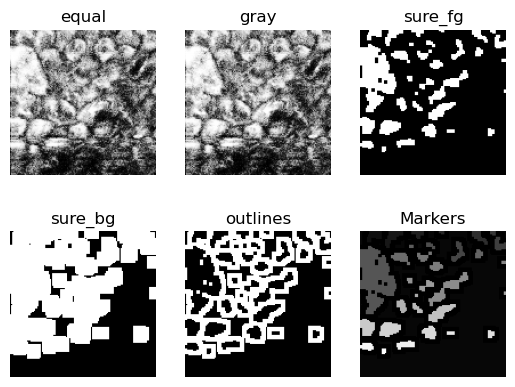

Anzahl an Zellen: 33


True

In [11]:
img = cv2.imread('equal.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# threshold to the grayscale image to binarize it and seperate the cells from the background
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#use morphological operations such as erosion and dilation to remove noise and improve cell separation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
#apply distance transformation to detect the cells edges
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.2*dist_transform.max(),255,0)
#use a watershed algorithm to segment the cells
sure_fg = np.uint8(sure_fg)
unknow = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers +1
markers[unknow==255] = 0
#count the numbers of cells detected
cells_count = len(np.unique(markers))-1

# plot images
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('equal')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sure_fg, cmap='gray')
plt.title('sure_fg')
plt.axis('off')
  
plt.subplot(2, 3, 4)
plt.imshow(sure_bg, cmap='gray')
plt.title('sure_bg')
plt.axis('off')
  
plt.subplot(2, 3, 5)
plt.imshow(unknow, cmap='gray')
plt.title('outlines')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(markers, cmap='gray')
plt.title('Markers')
plt.axis('off')

plt.show()
print(f'Anzahl an Zellen: {cells_count}')
cv2.imwrite('markers2.png', unknow)